In [27]:
import sqlite3, matplotlib.pyplot as plt, pandas as pd, numpy as np
%matplotlib inline
connection = sqlite3.connect('../database.db')

notebookMetrics = ['precision', 'f1_score', 'roc_auc', 'recall', 'specificity']

## General graph for each class metric

In [28]:
df = pd.read_sql_query("""
    SELECT nb.architecture, nb.configuration_id, met.precision, met.f1_score, met.roc_auc, met.recall, met.specificity
    FROM metrics AS met JOIN notebook AS nb
    ON met.notebook_id = nb.id
    WHERE met.type = 'Melanoma';
""", connection)
df

,architecture,configuration_id,precision,f1_score,roc_auc,recall,specificity
0,ConvNeXt,1,0.471014,0.498084,0.918118,0.528455,0.946754
1,ResNetV2,1,0.304348,0.345070,0.827368,0.398374,0.918308
2,Xception,1,0.263682,0.327160,0.830359,0.430894,0.892050
3,ConvNeXt,2,0.435484,0.291892,0.842412,0.219512,0.974471
4,ResNetV2,2,0.207627,0.272981,0.707714,0.398374,0.863603
...,...,...,...,...,...,...,...
60,ResNetV2,21,0.483871,0.194805,0.689100,0.121951,0.988330
61,Xception,21,0.401408,0.430189,0.786554,0.463415,0.938001
62,ConvNeXt,22,0.393939,0.407843,0.833953,0.422764,0.941648
63,ResNetV2,22,0.350467,0.445104,0.823234,0.609756,0.898614


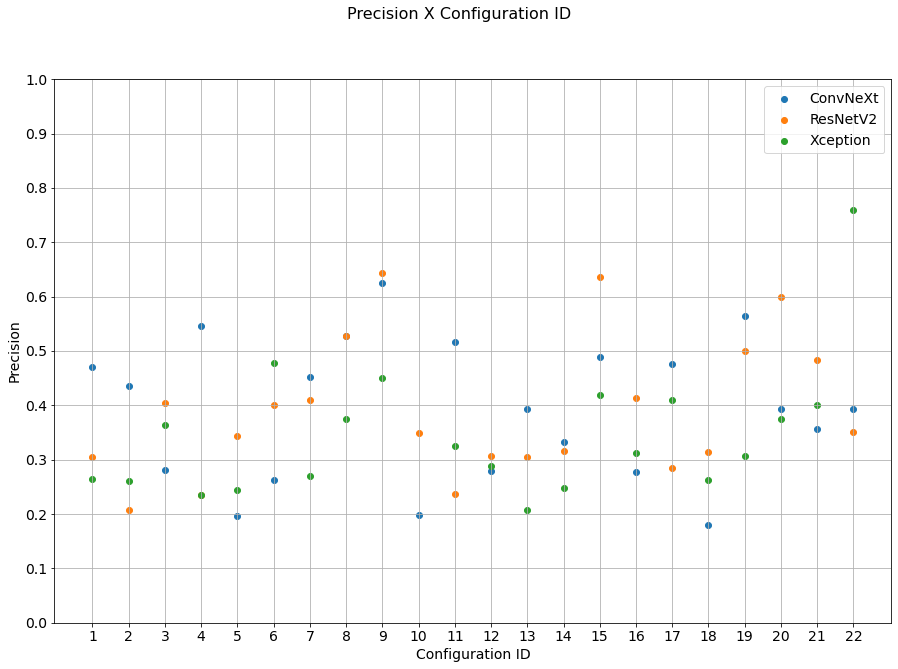

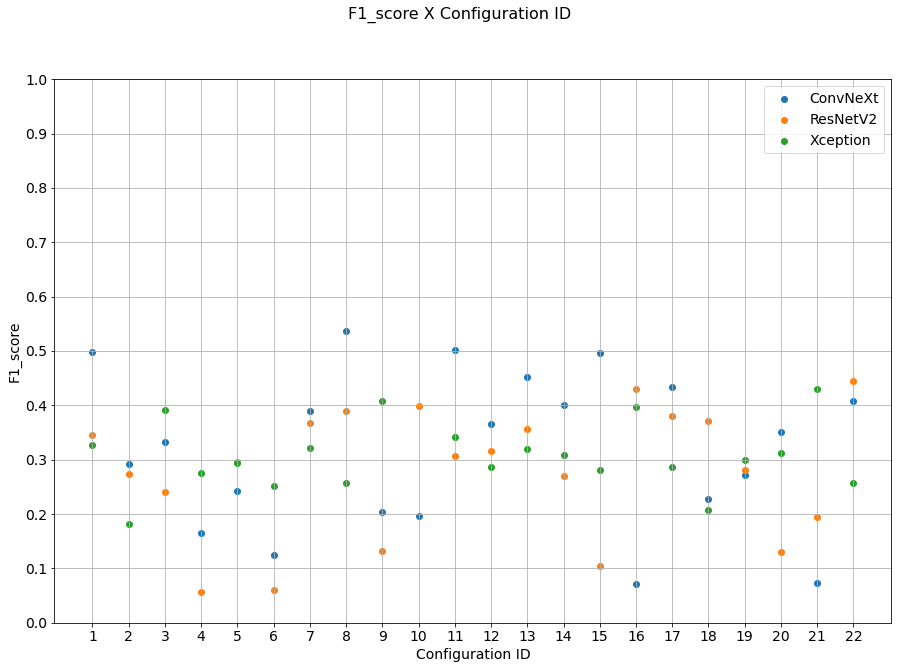

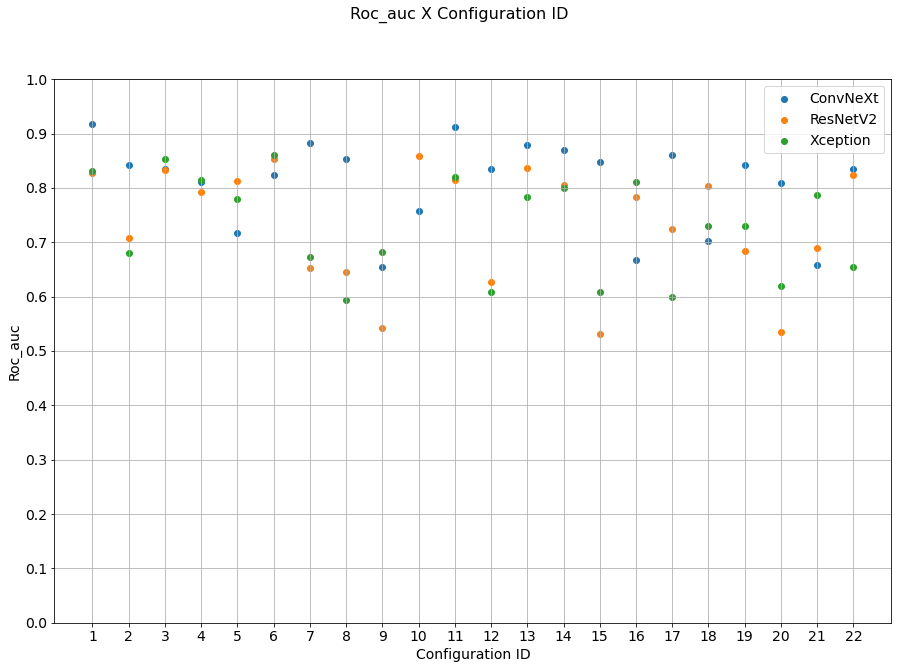

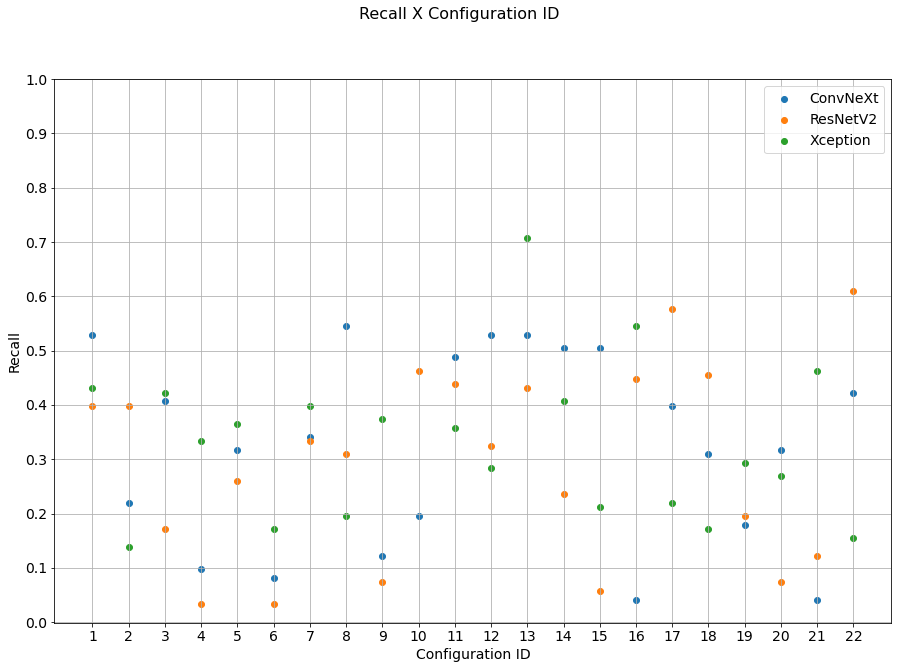

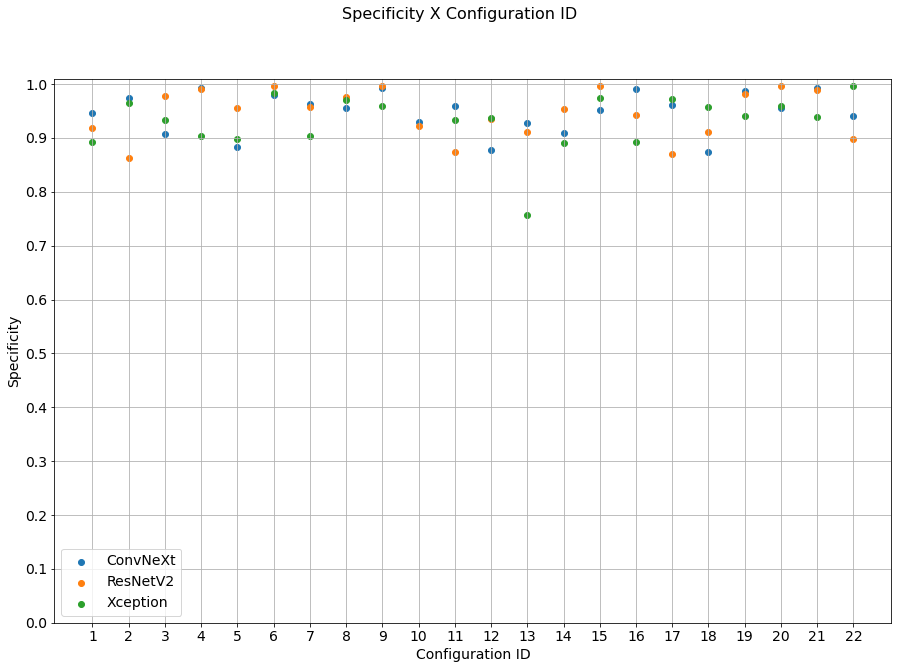

In [29]:
for i, metric in enumerate(notebookMetrics):
    plt.figure(figsize=(15,10))
    plt.rc('font', size=14)
    for arch, group in df.groupby('architecture'):
        plt.scatter(group['configuration_id'], group[metric], label=arch, marker='o')
    plt.xticks(range(df['configuration_id'].min(), df['configuration_id'].max() + 1))
    plt.ylabel(metric.capitalize())
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel('Configuration ID')
    plt.legend()
    plt.grid()
    plt.suptitle(''.join([metric.capitalize(),' X Configuration ID']), fontsize=16)
    plt.show()

## List graphs for each class metric

In [30]:
df = pd.read_sql_query("""
    SELECT nb.configuration_id, nb.architecture, met.type, met.precision, met.f1_score, met.roc_auc, met.recall, met.specificity
    FROM metrics AS met JOIN notebook AS nb
    ON met.notebook_id = nb.id
    ORDER BY nb.id
""", connection)
df

,configuration_id,architecture,type,precision,f1_score,roc_auc,recall,specificity
0,1,ConvNeXt,Bowens_disease,0.480000,0.338028,0.962992,0.260870,0.991022
1,1,ConvNeXt,Basal_cell_carcinoma,0.761905,0.750000,0.987242,0.738462,0.989503
2,1,ConvNeXt,Benign_keratosis,0.591549,0.585366,0.921198,0.579310,0.957005
3,1,ConvNeXt,Dermatofibroma,0.875000,0.608696,0.976020,0.466667,0.999324
4,1,ConvNeXt,Vascular_lesion,0.941176,0.864865,0.999355,0.800000,0.999322
...,...,...,...,...,...,...,...,...
450,22,Xception,Benign_keratosis,0.428571,0.500000,0.861090,0.600000,0.914010
451,22,Xception,Dermatofibroma,0.000000,0.000000,0.561618,0.000000,0.999324
452,22,Xception,Vascular_lesion,0.750000,0.250000,0.748965,0.150000,0.999322
453,22,Xception,Melanoma,0.760000,0.256757,0.654374,0.154472,0.995624


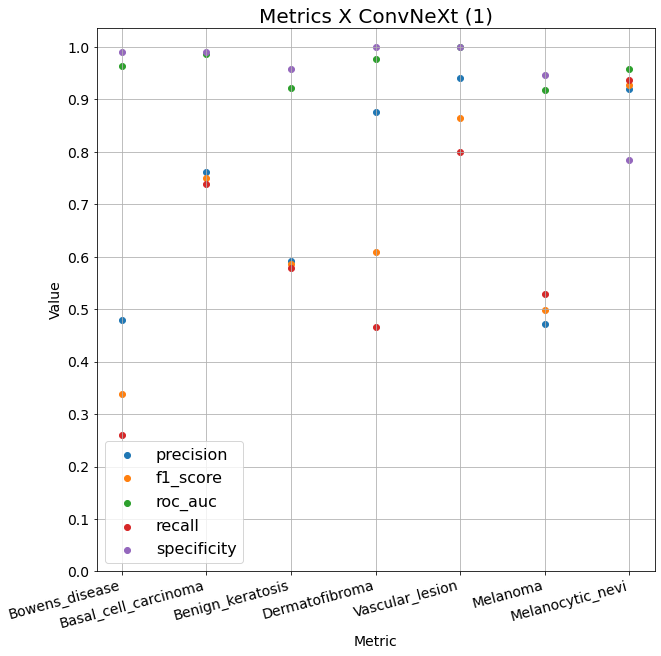

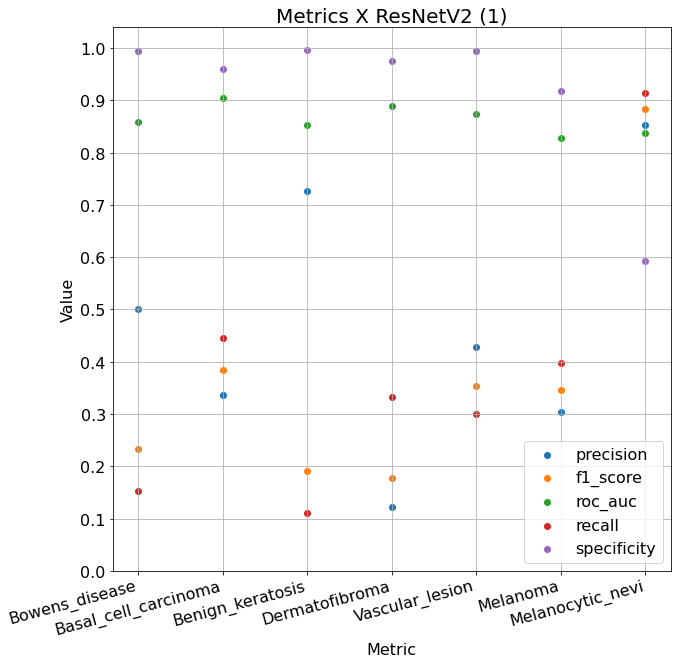

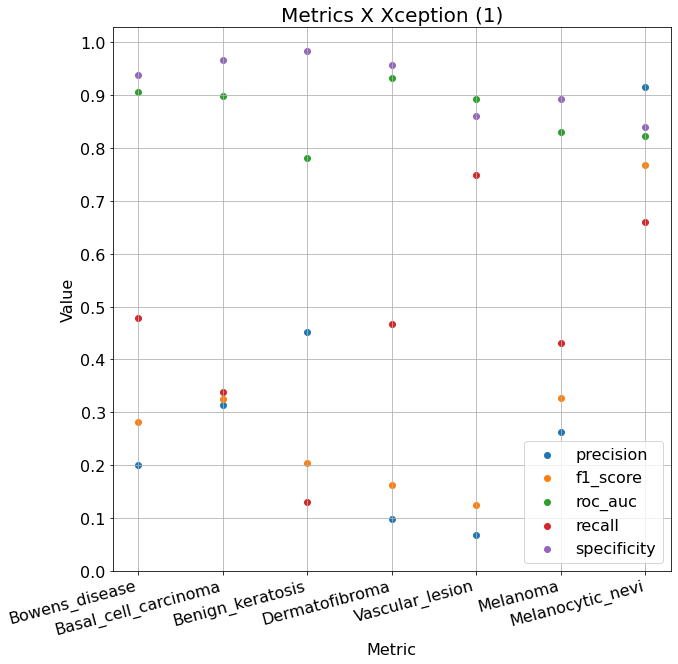

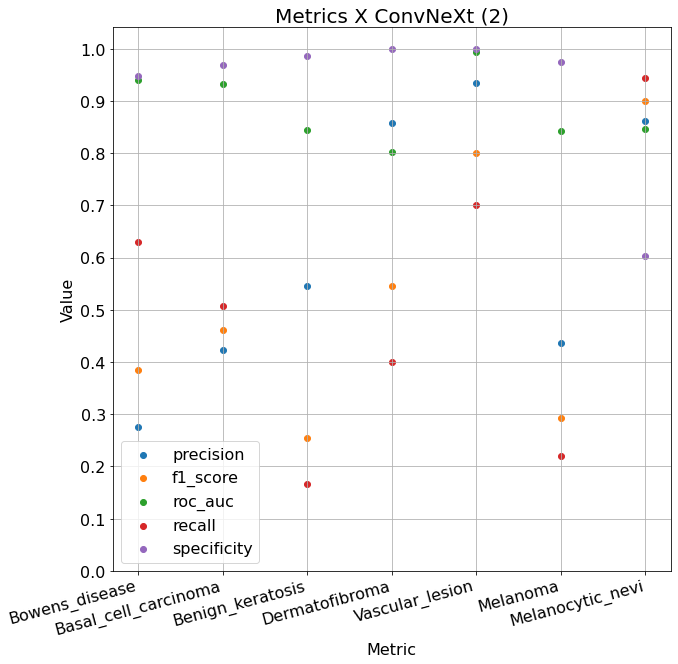

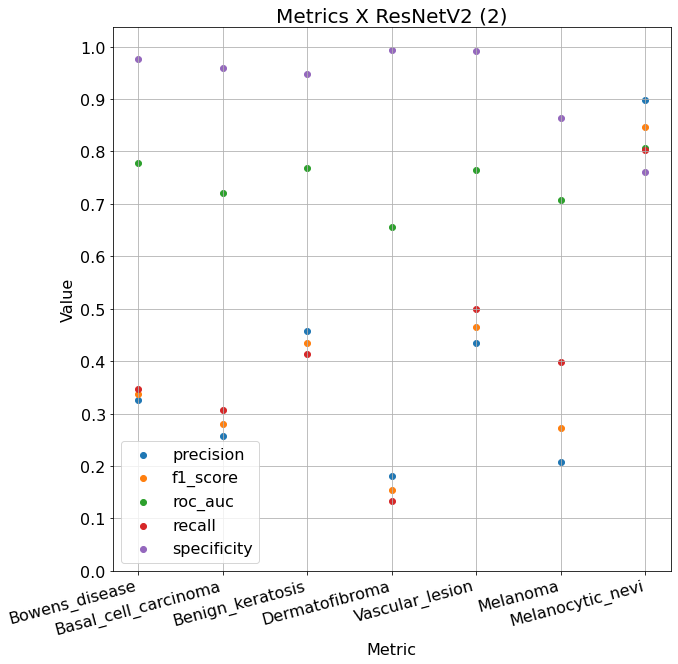

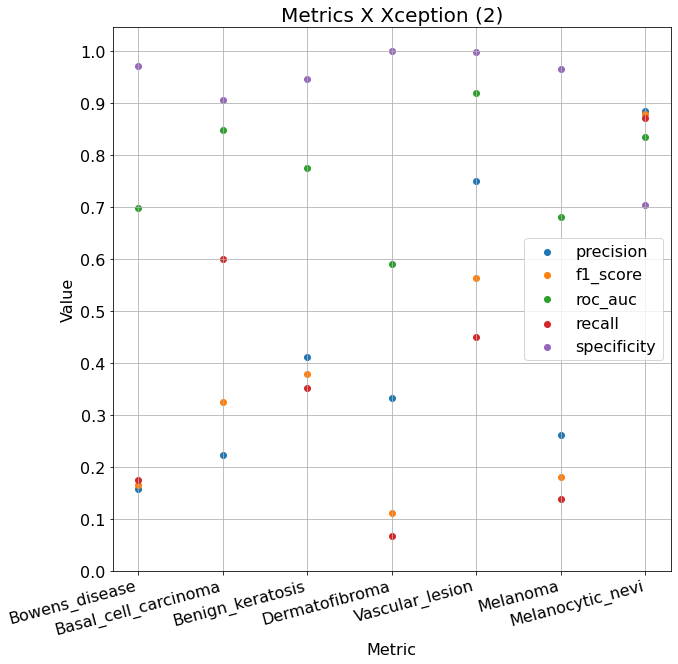

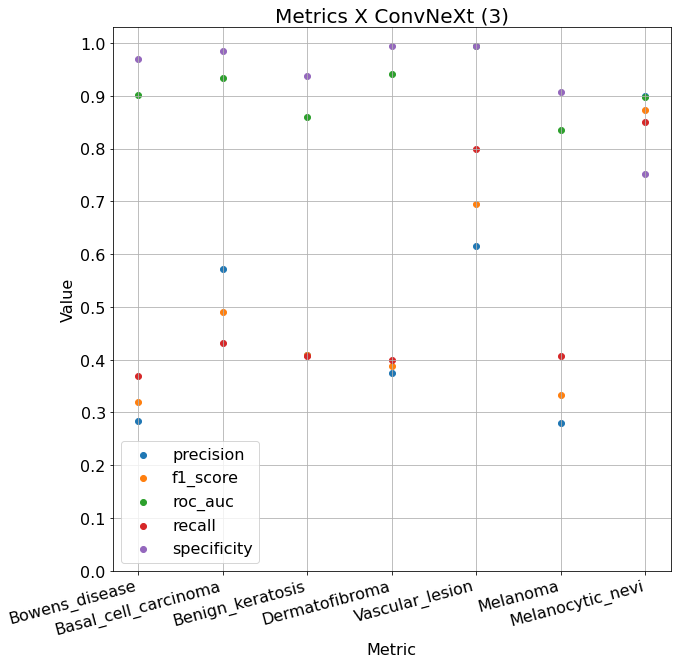

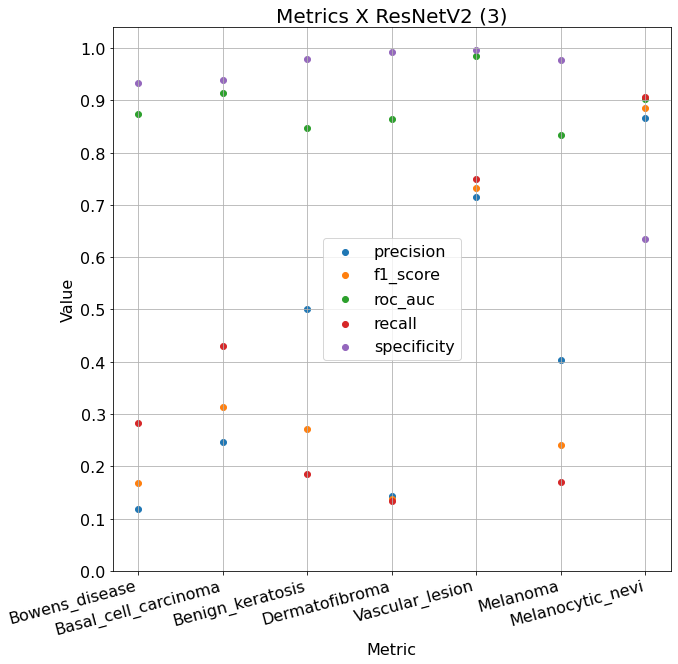

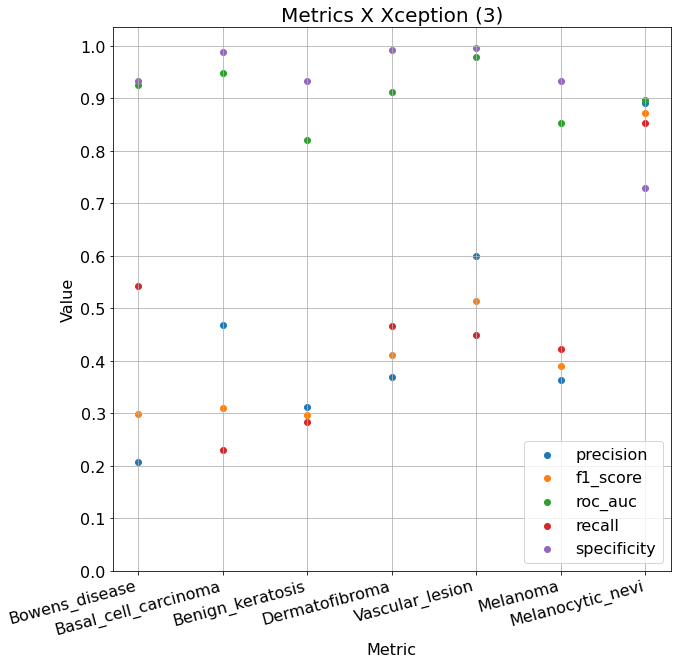

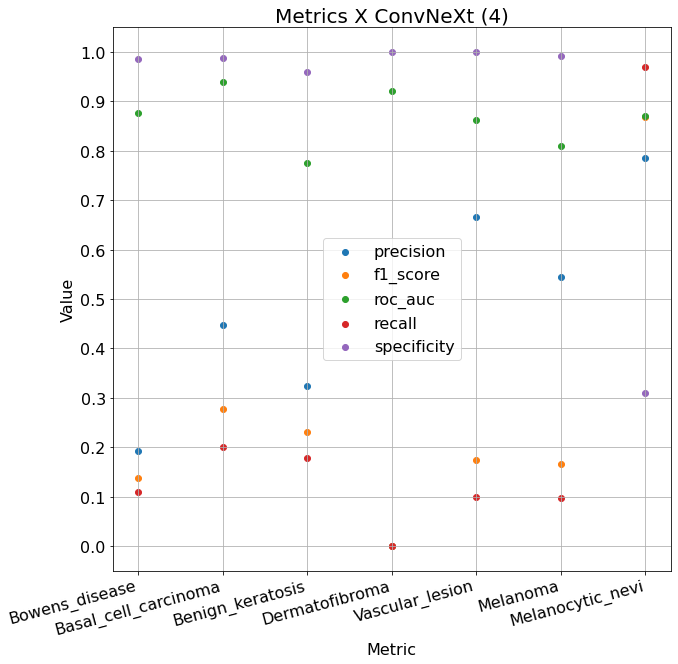

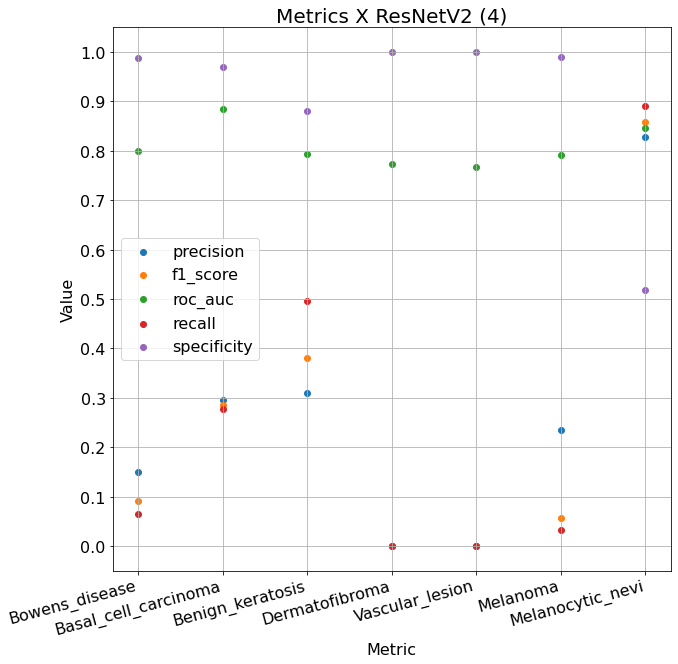

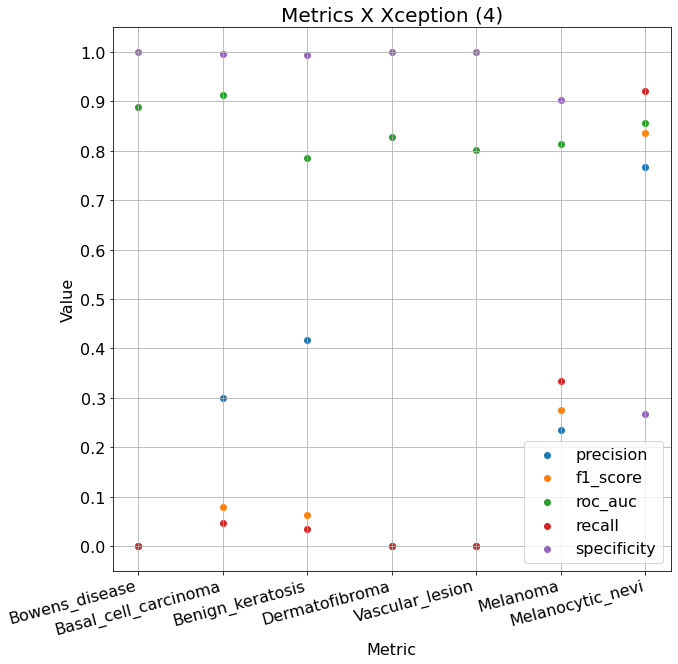

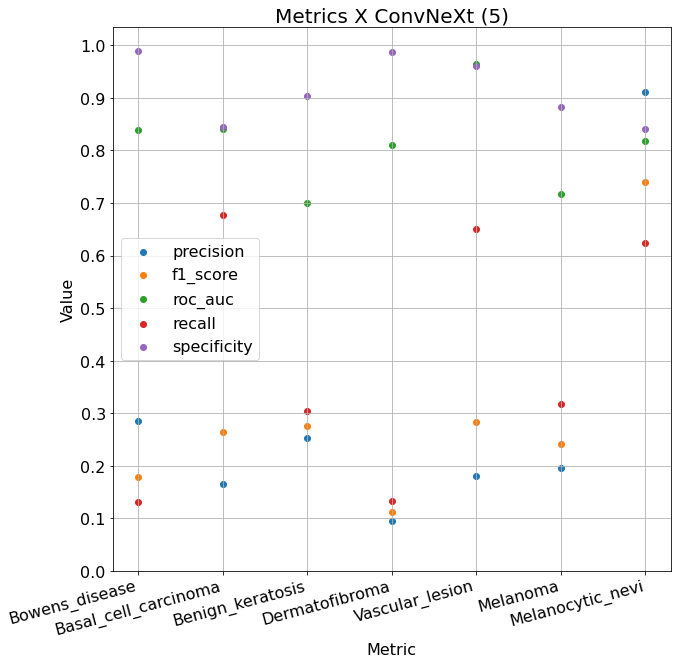

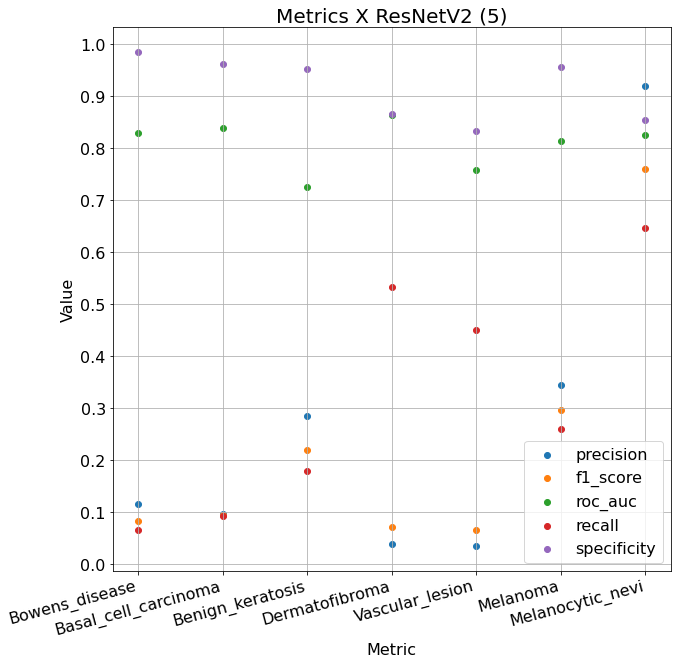

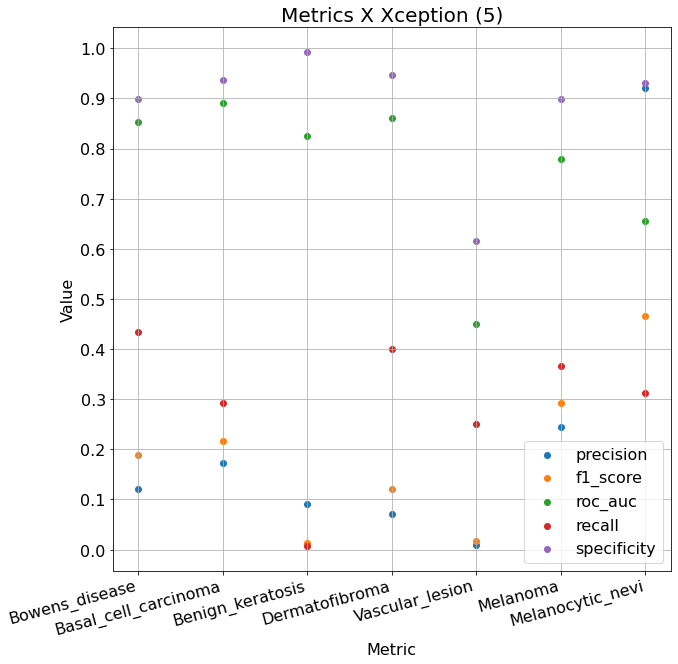

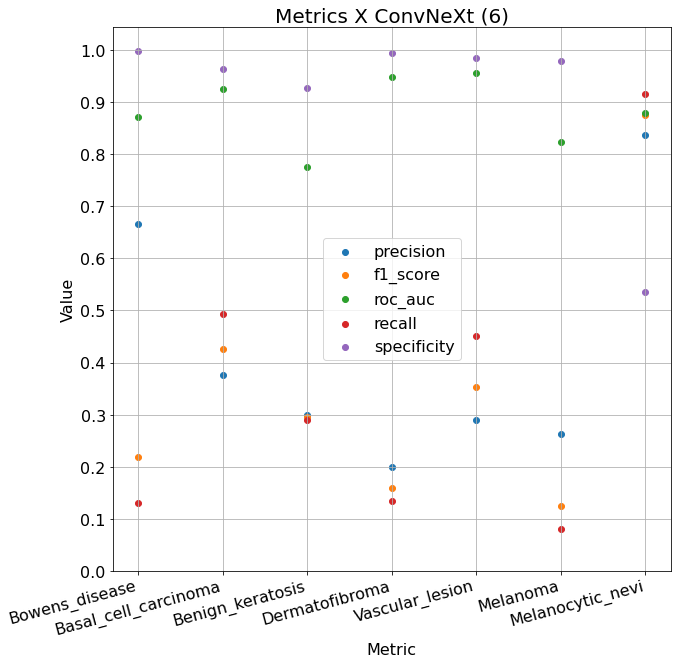

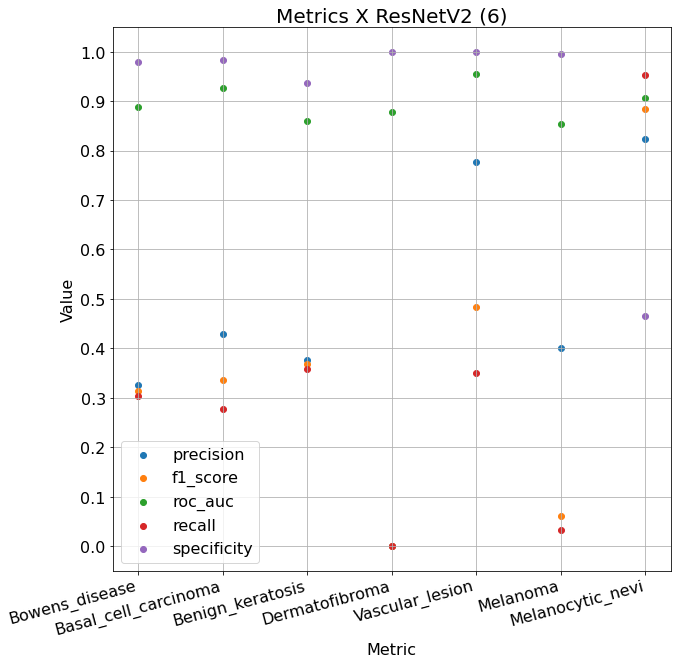

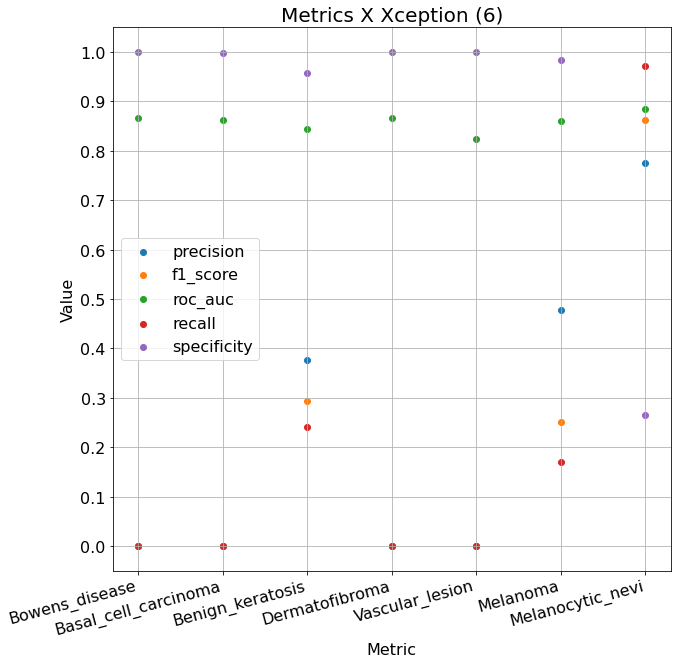

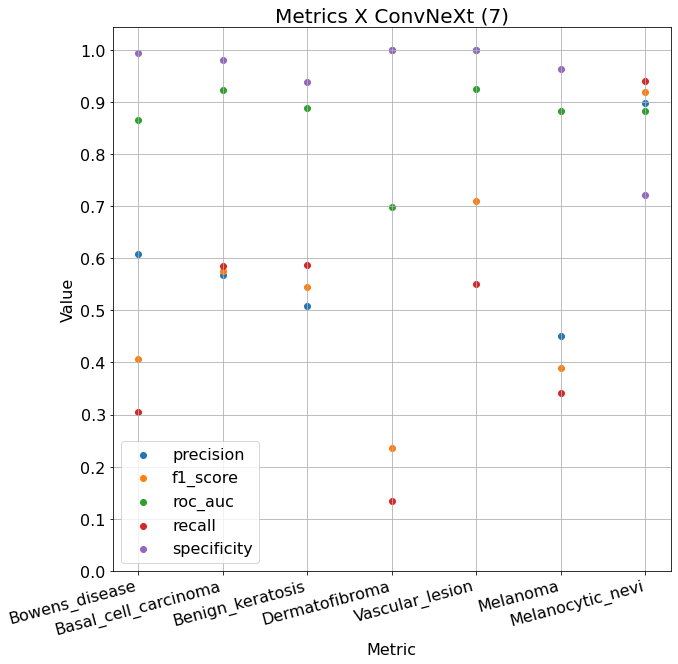

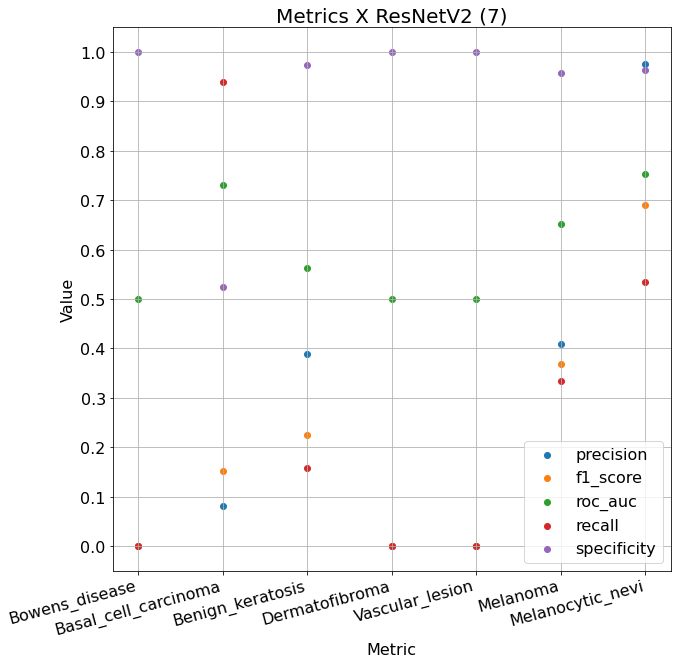

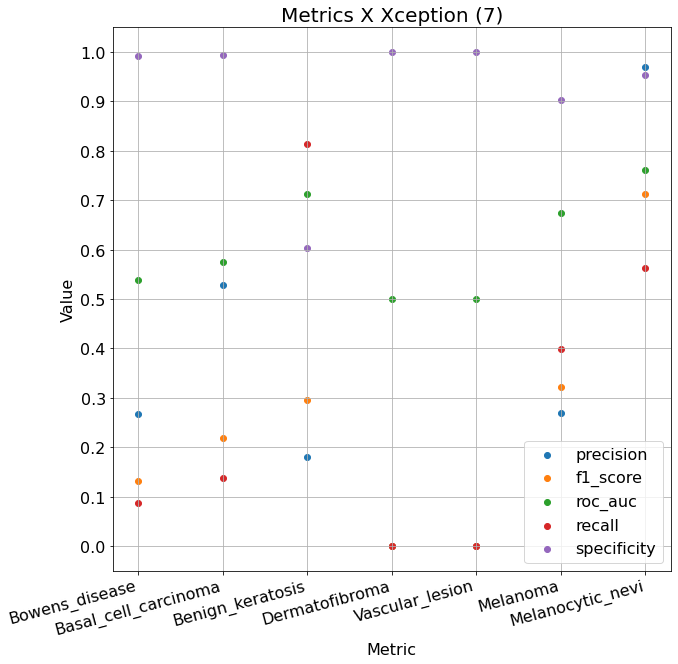

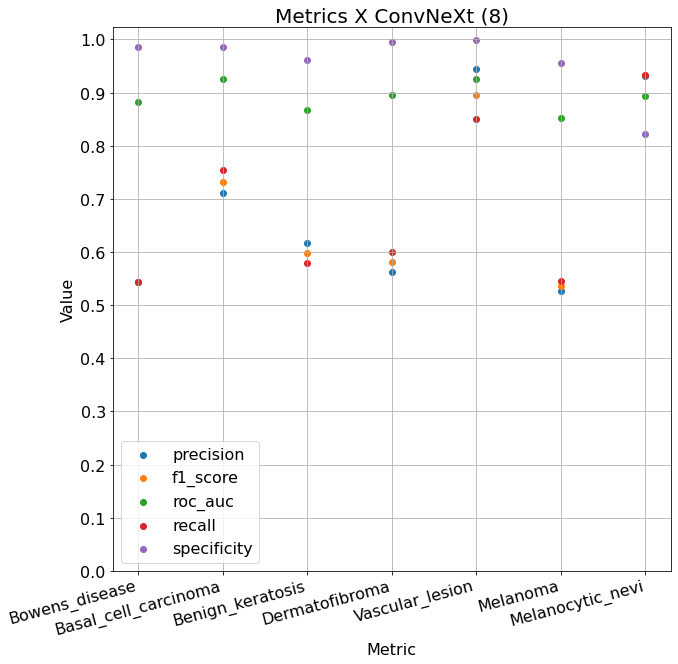

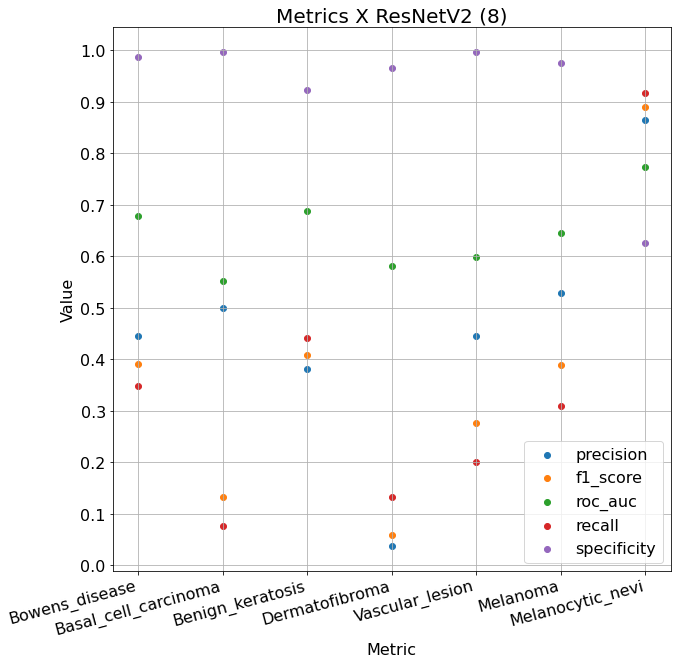

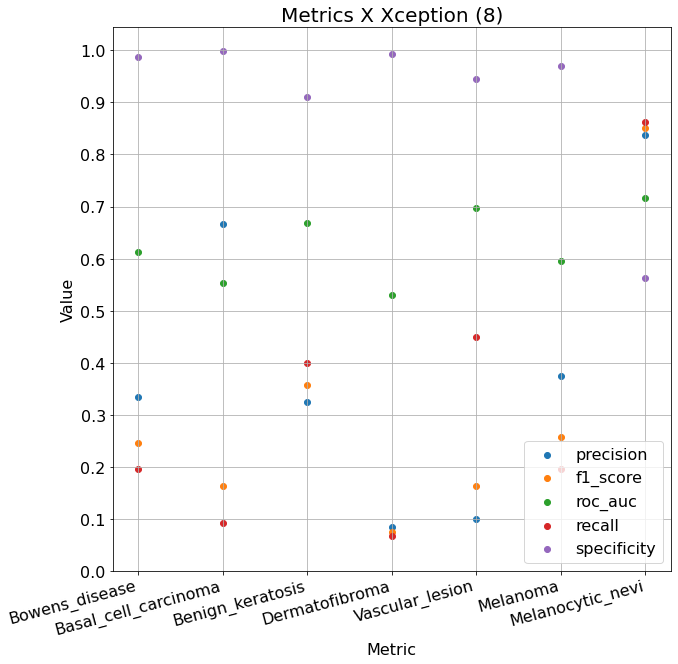

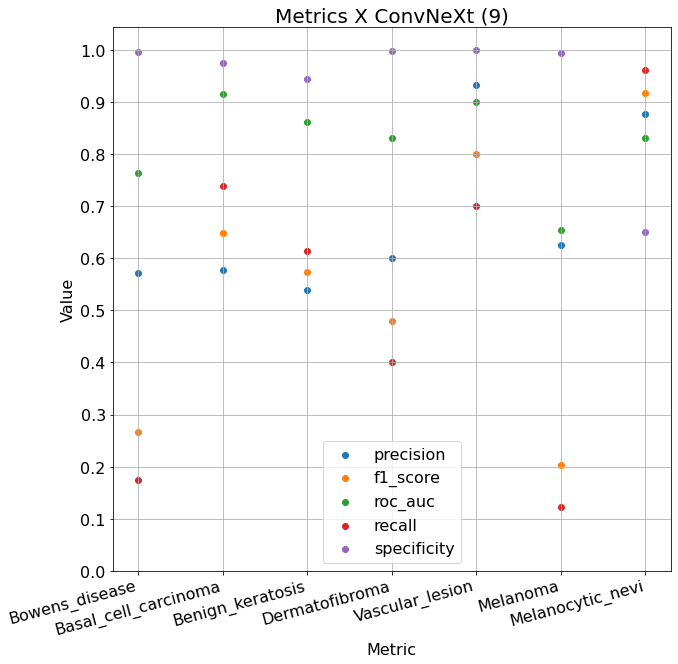

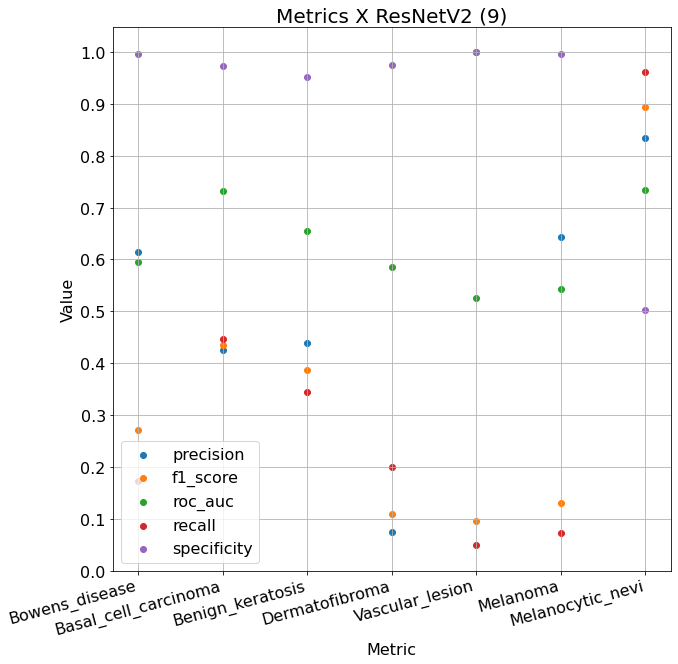

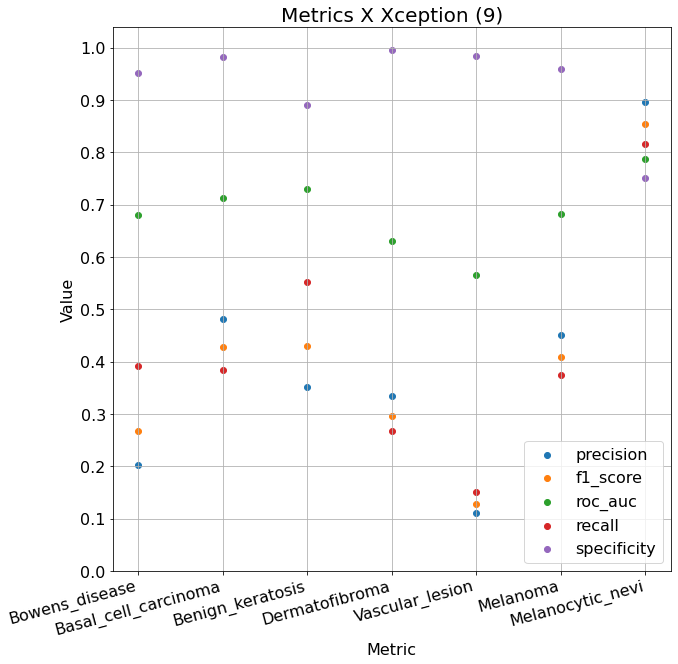

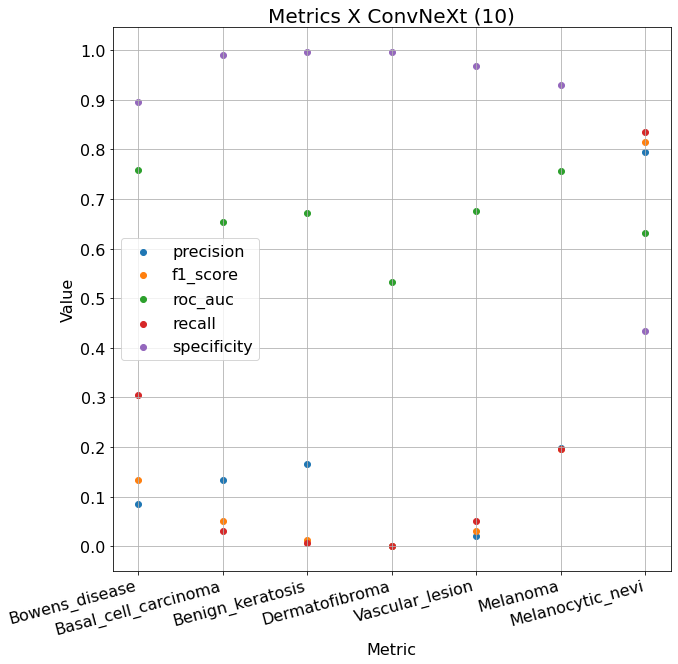

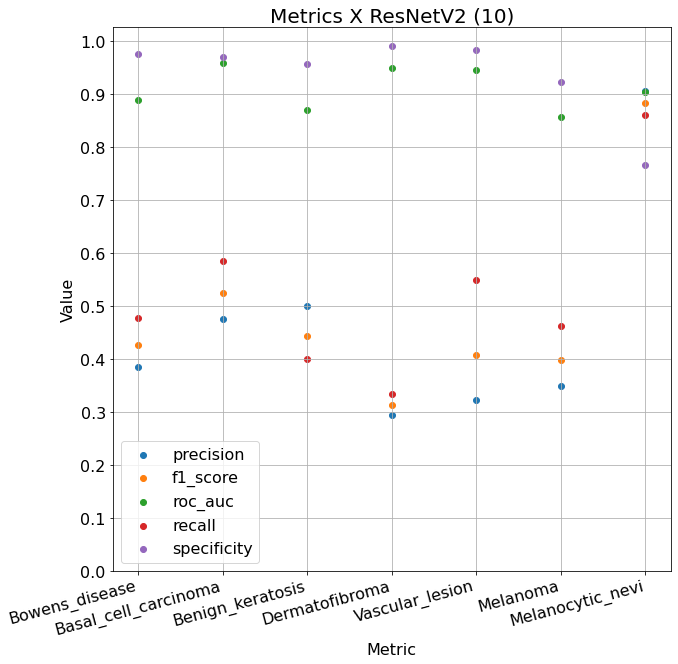

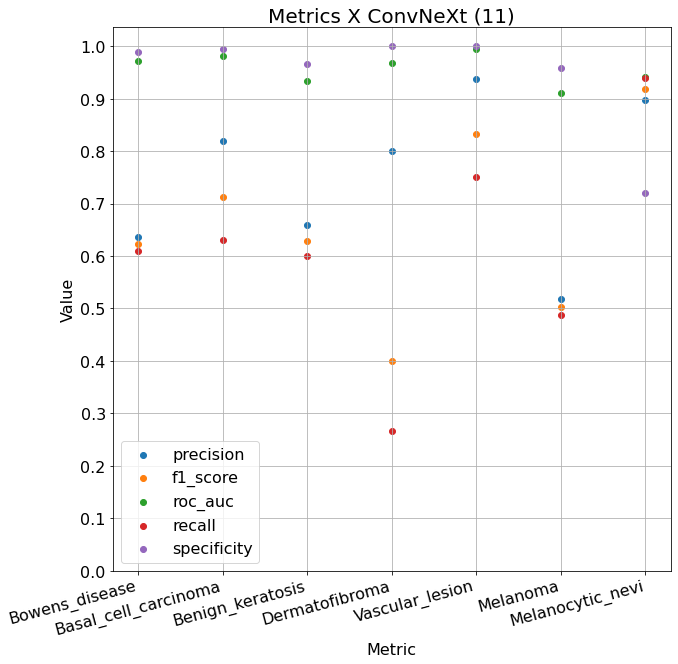

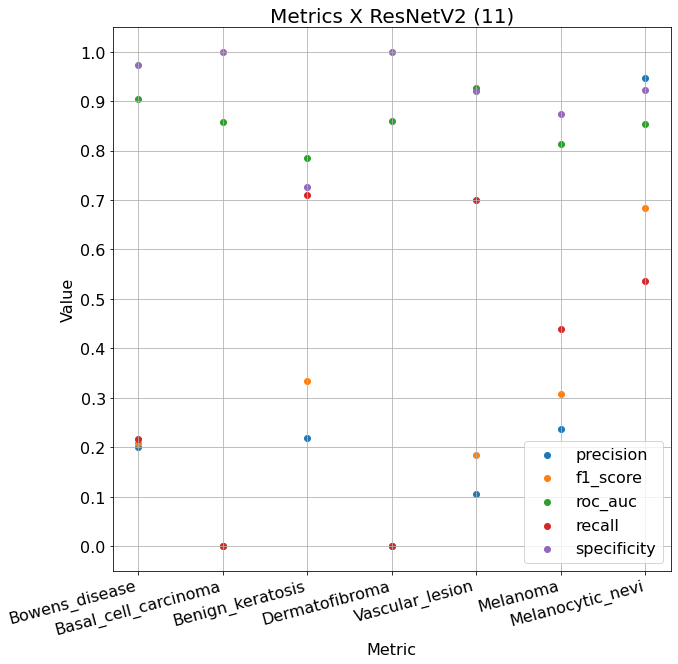

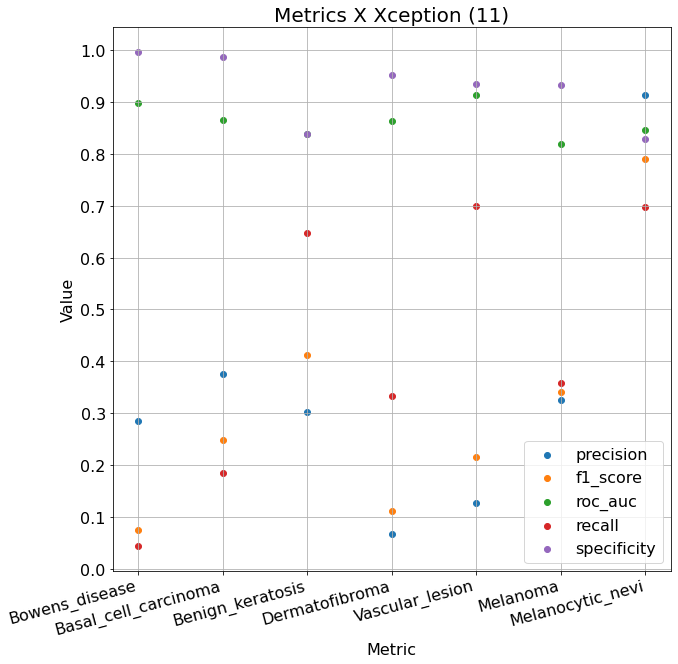

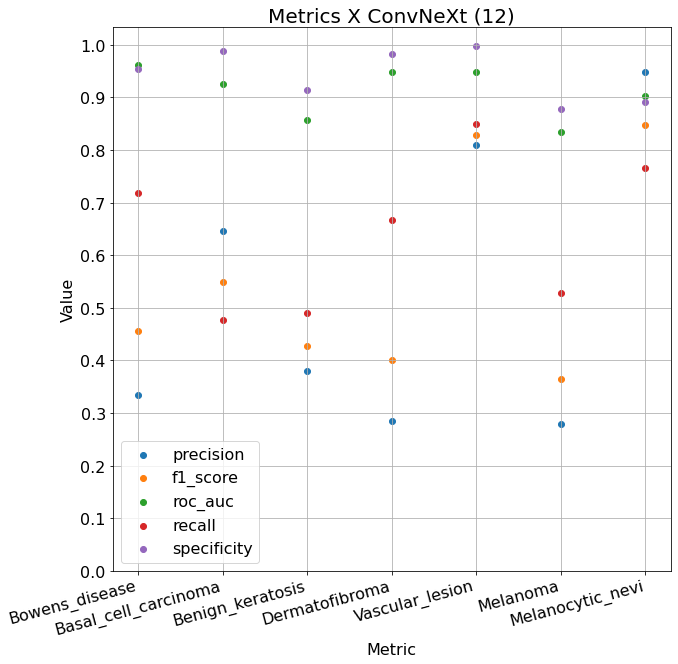

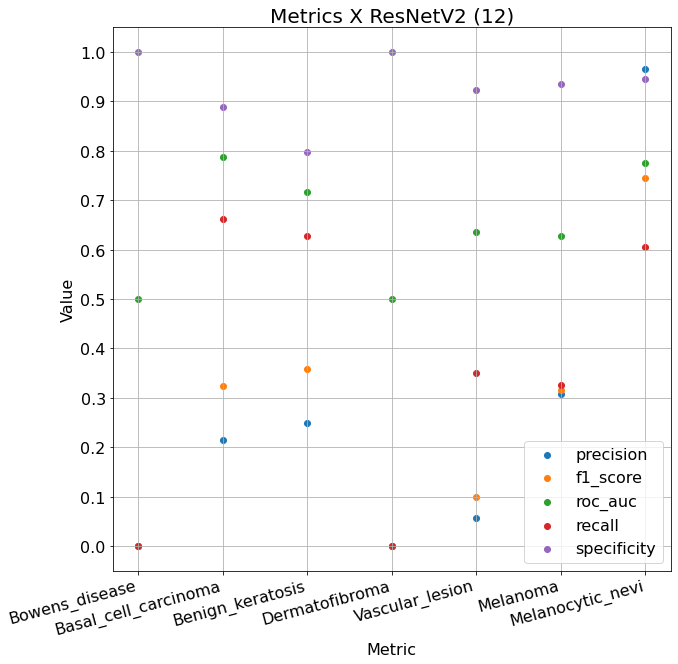

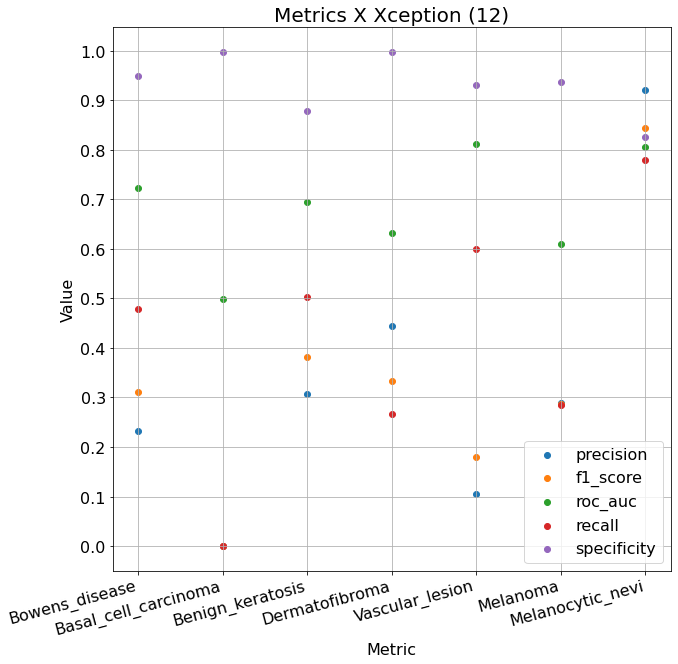

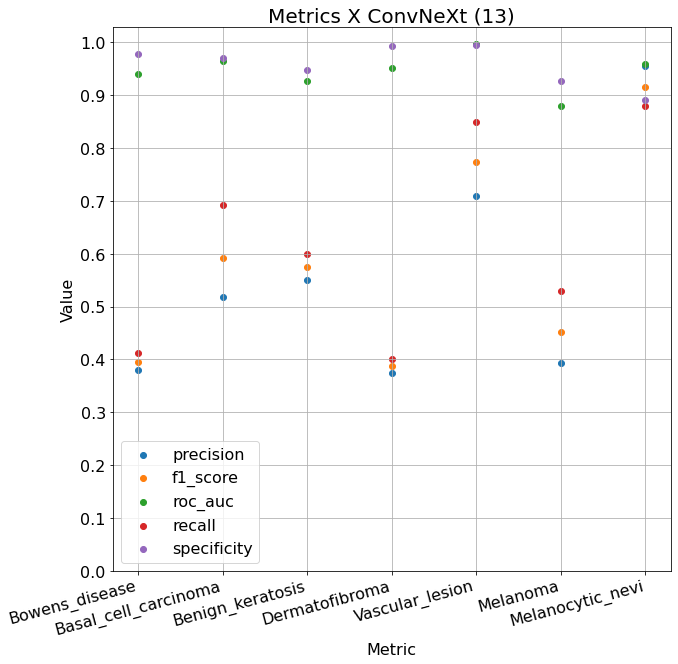

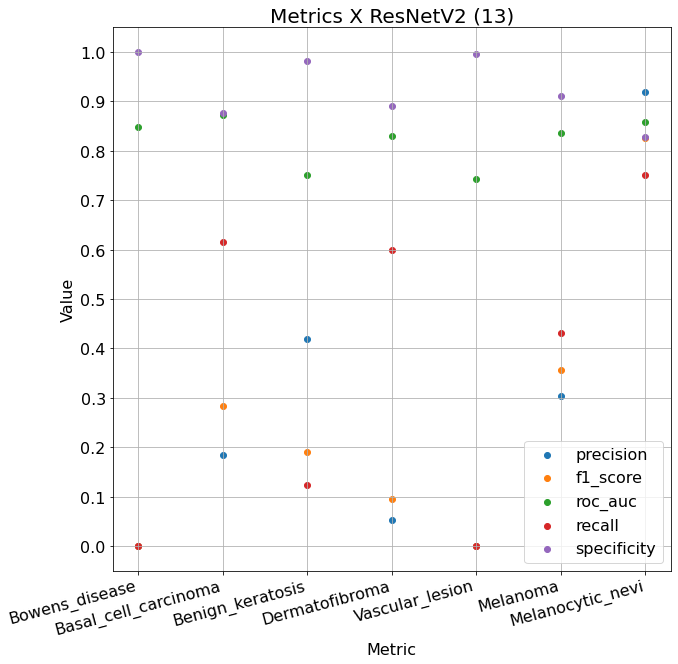

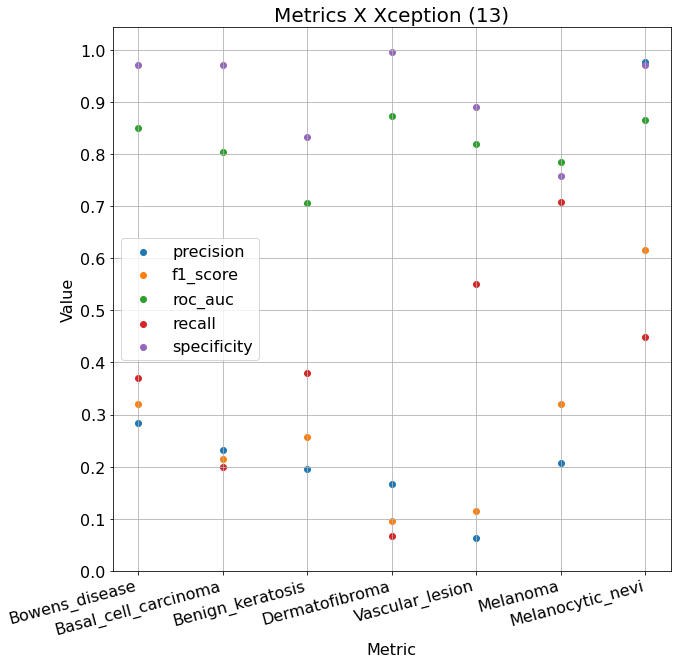

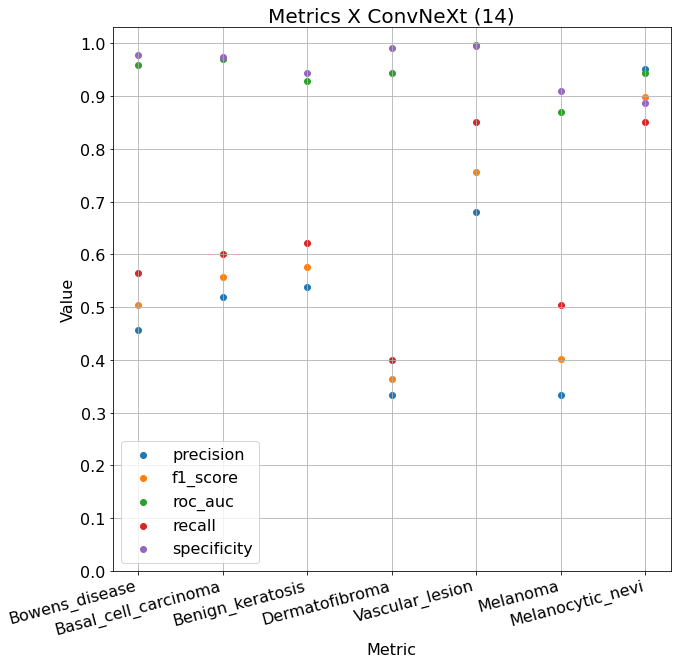

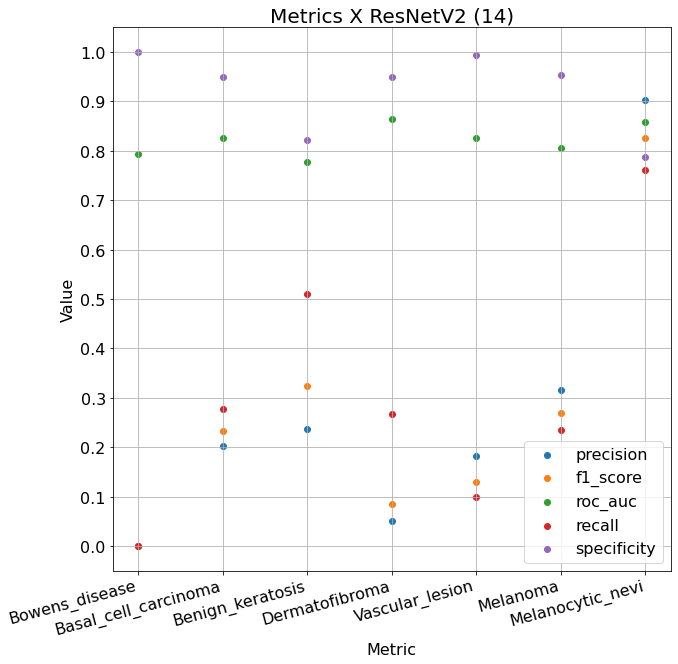

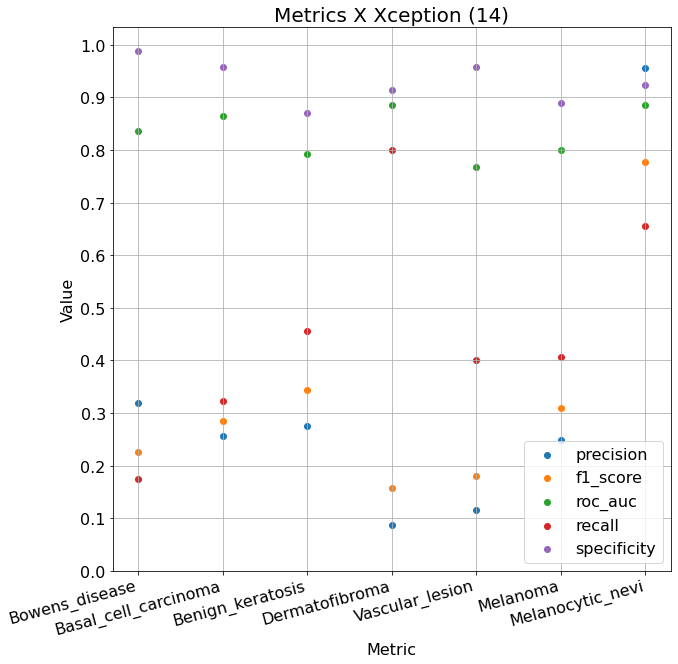

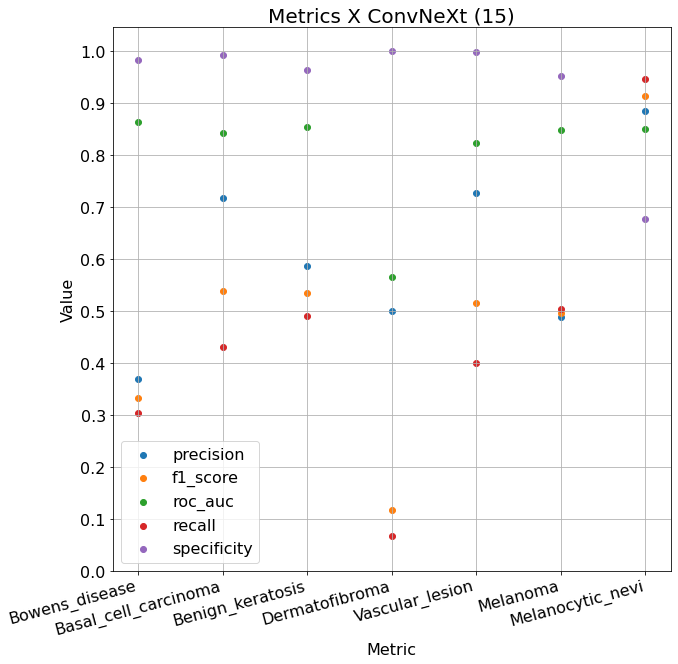

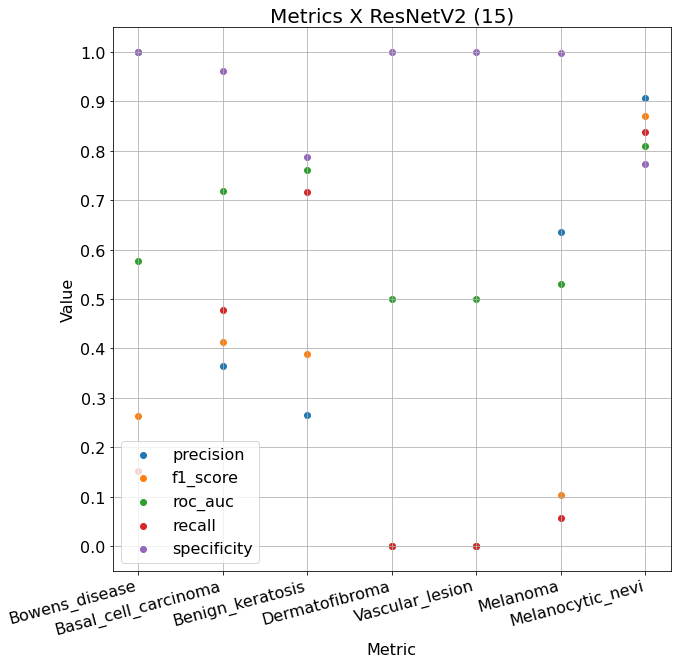

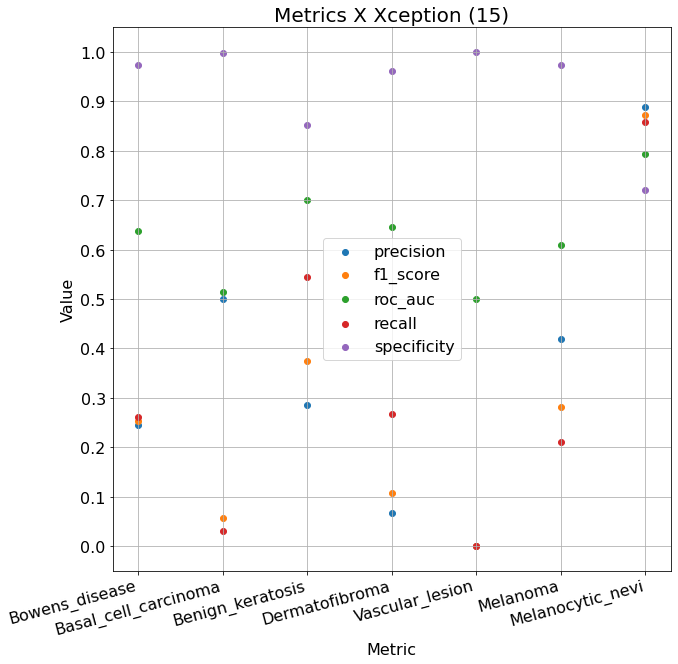

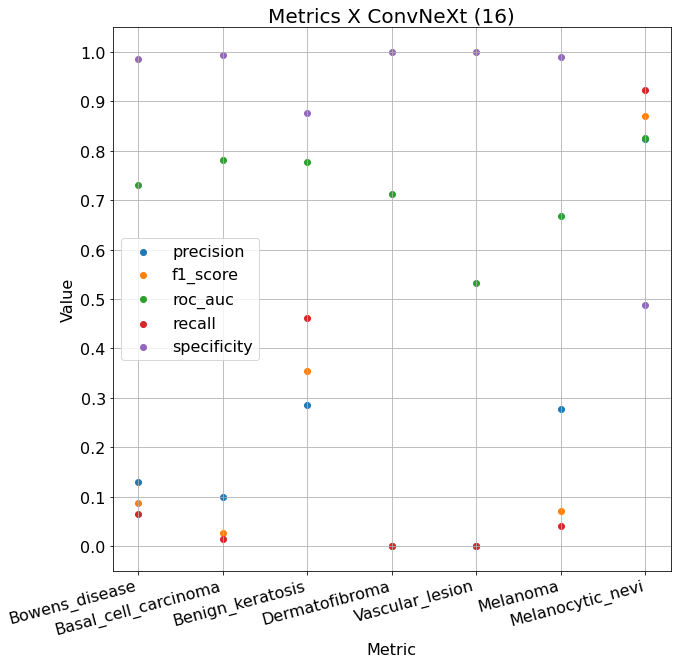

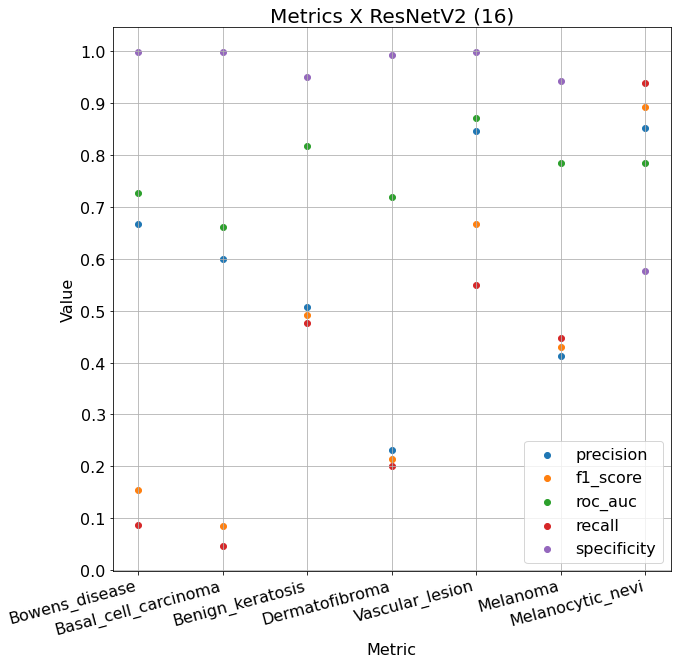

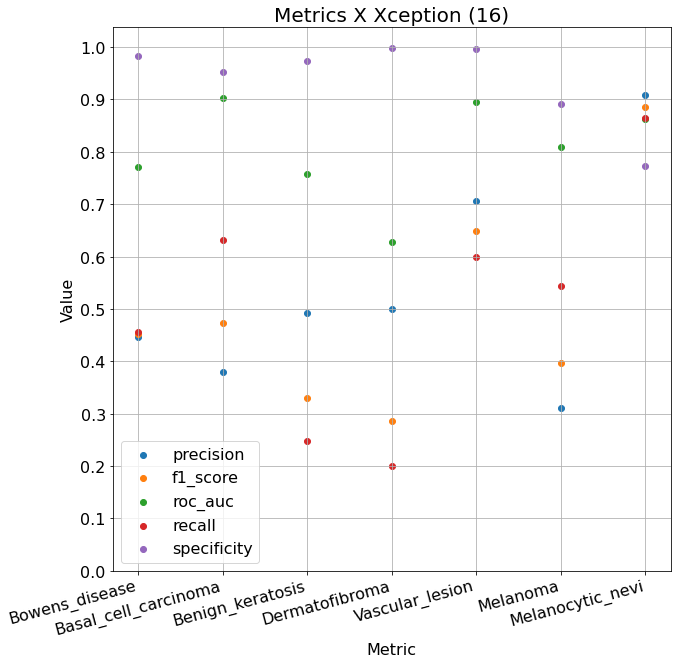

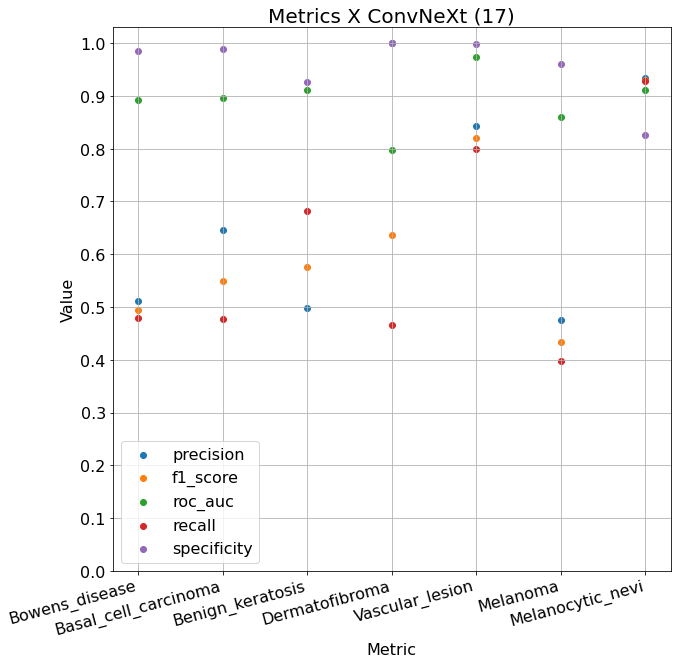

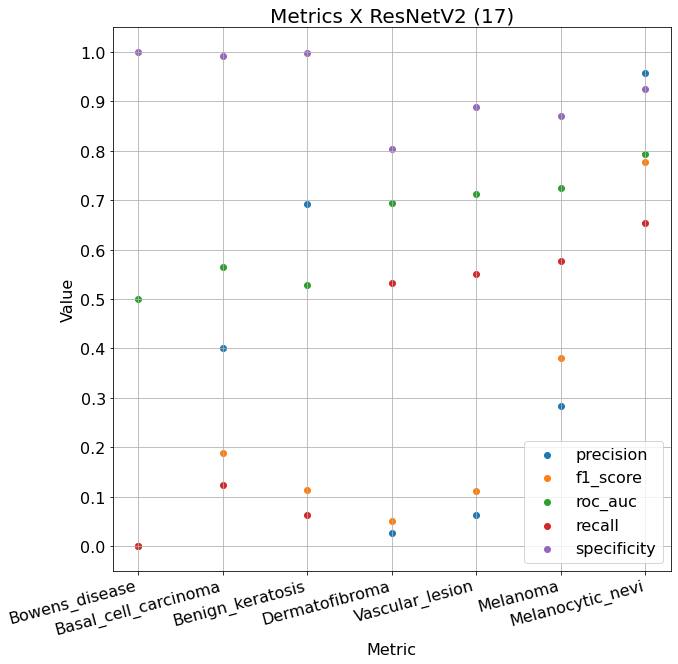

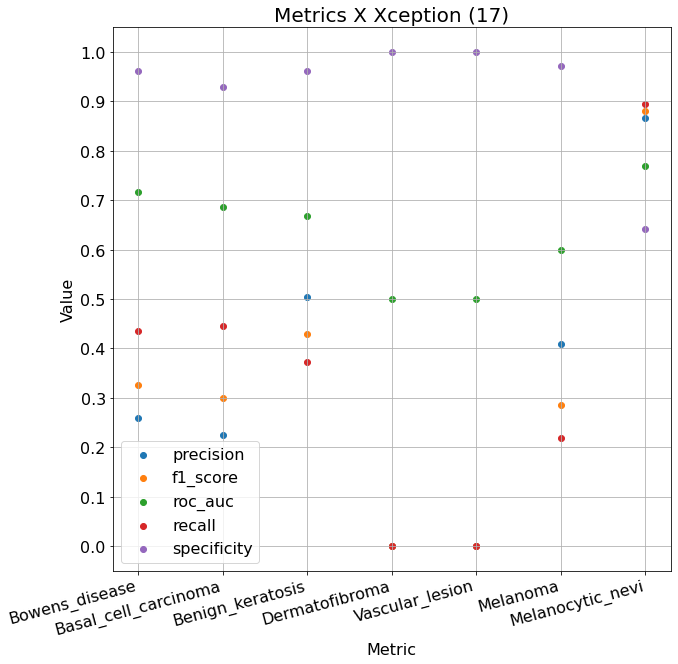

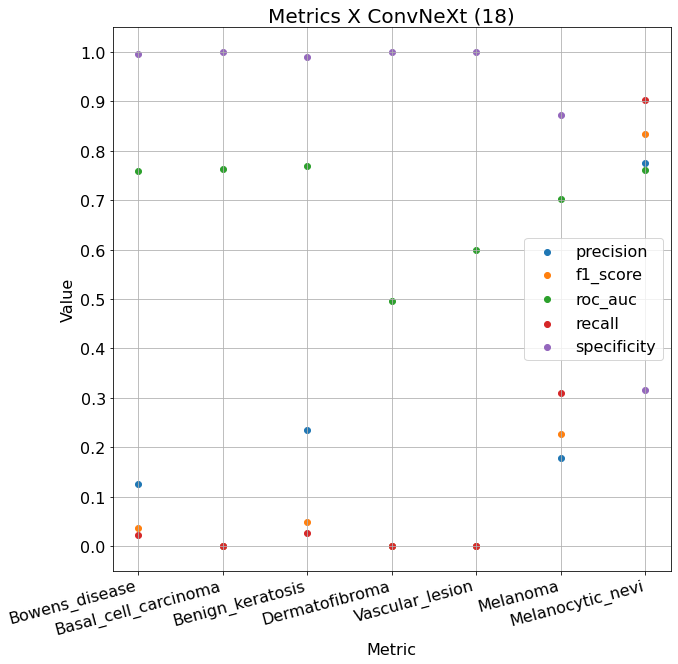

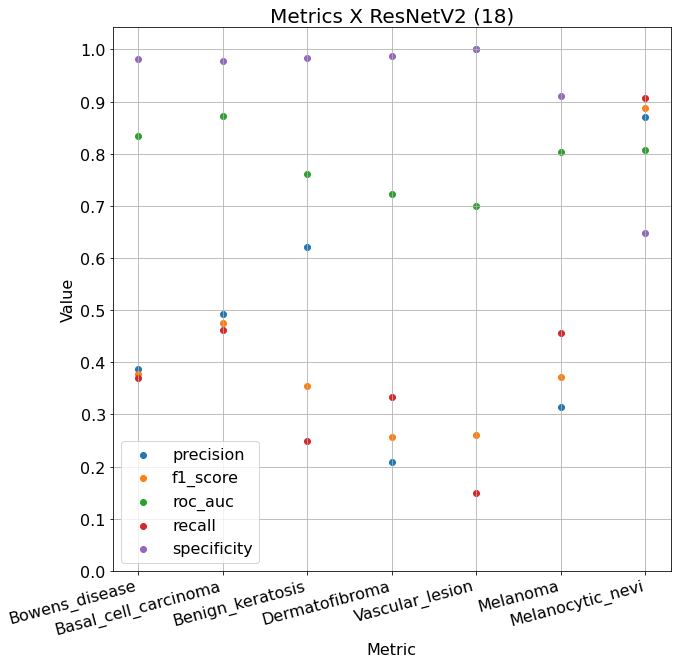

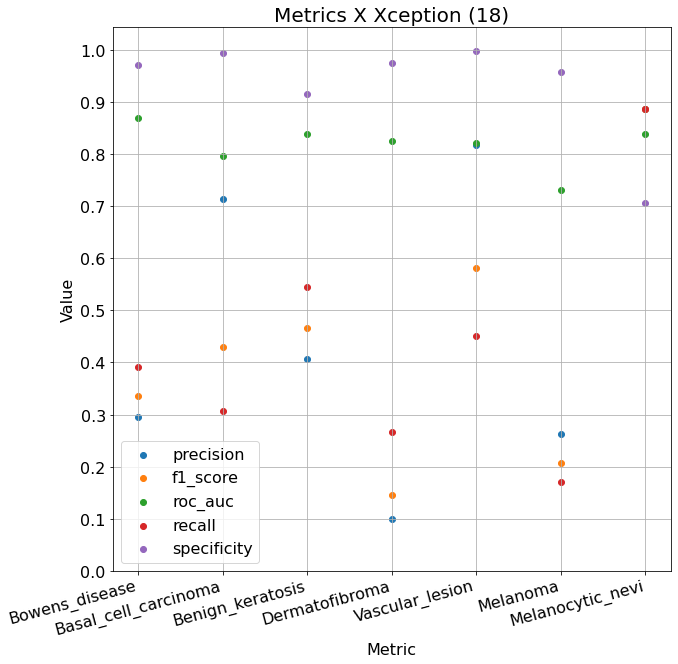

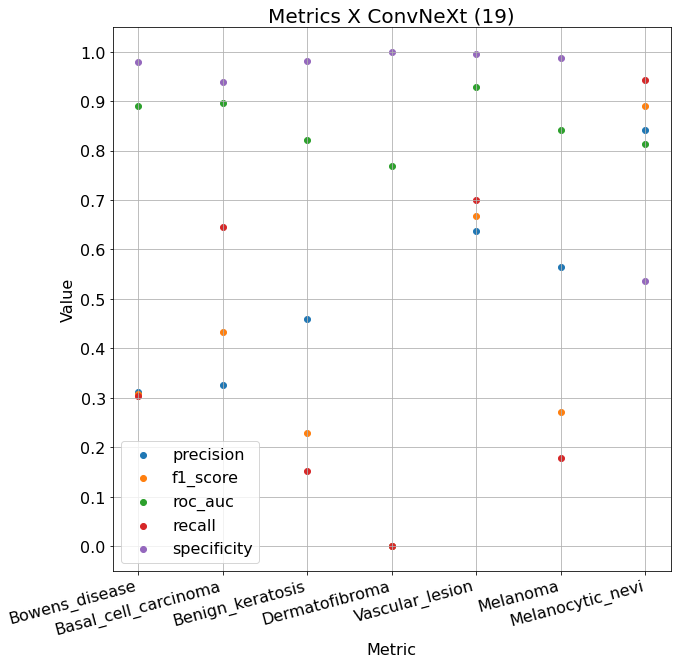

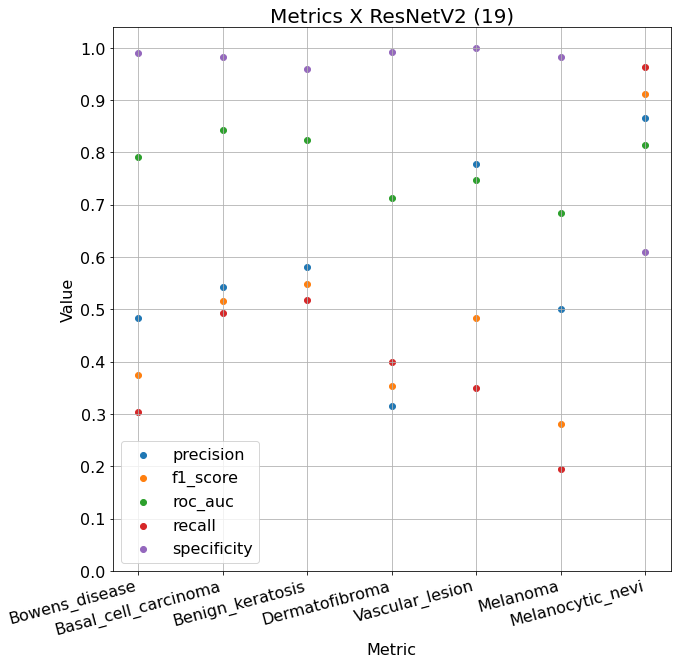

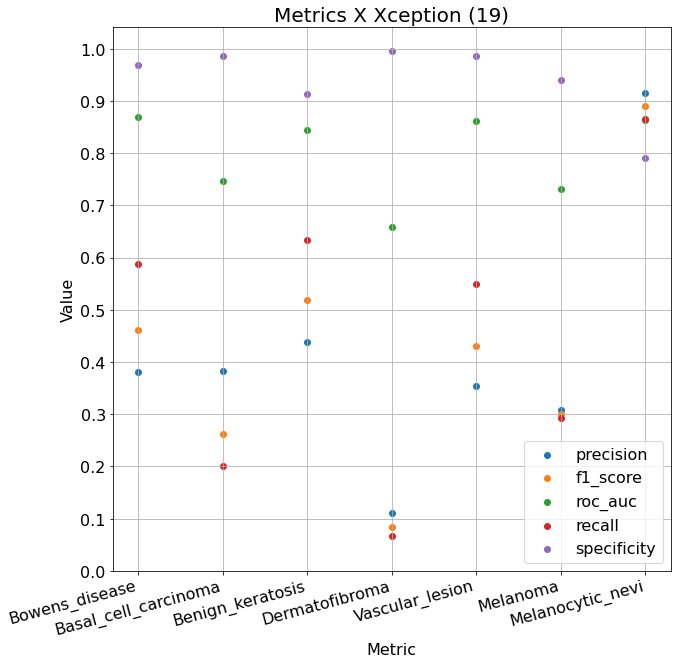

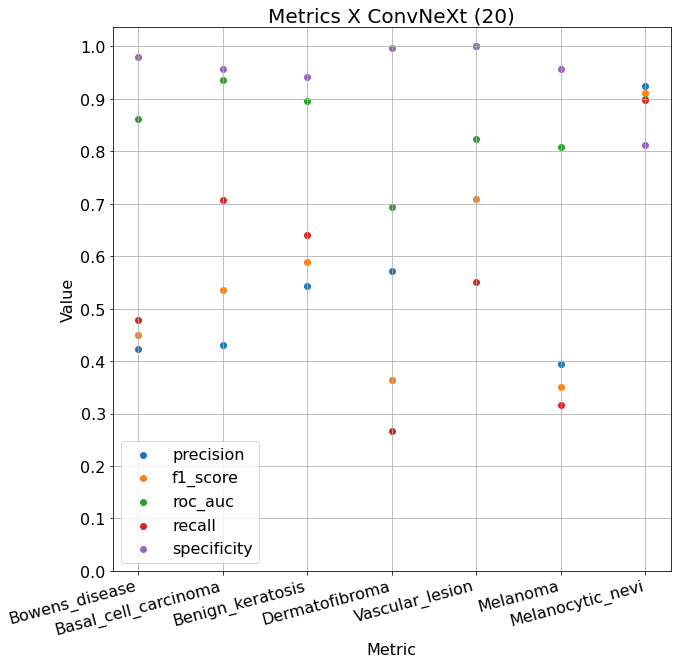

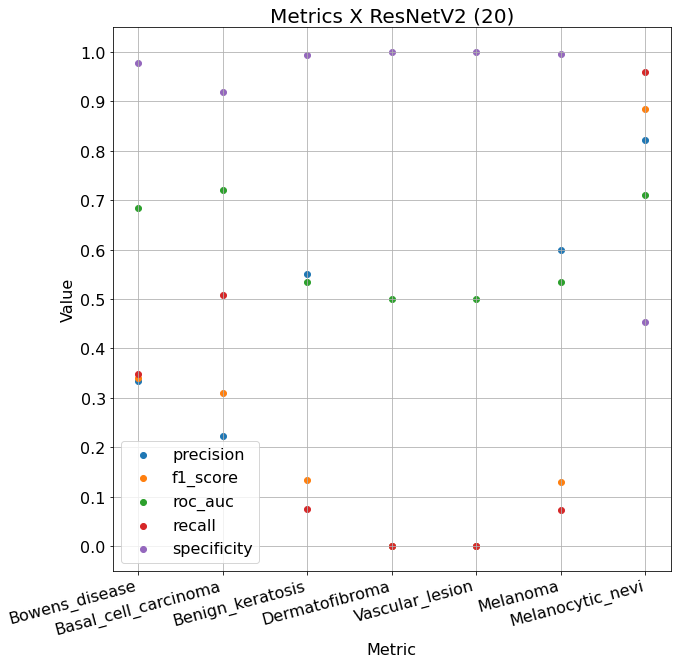

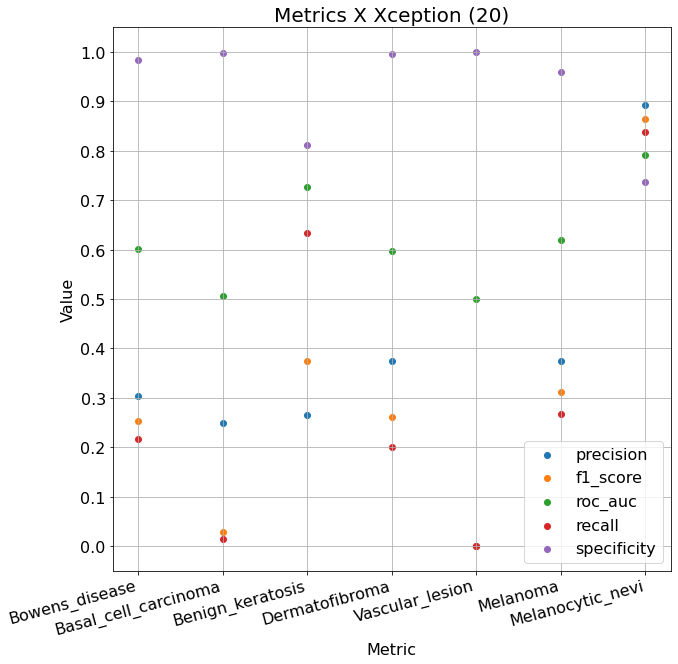

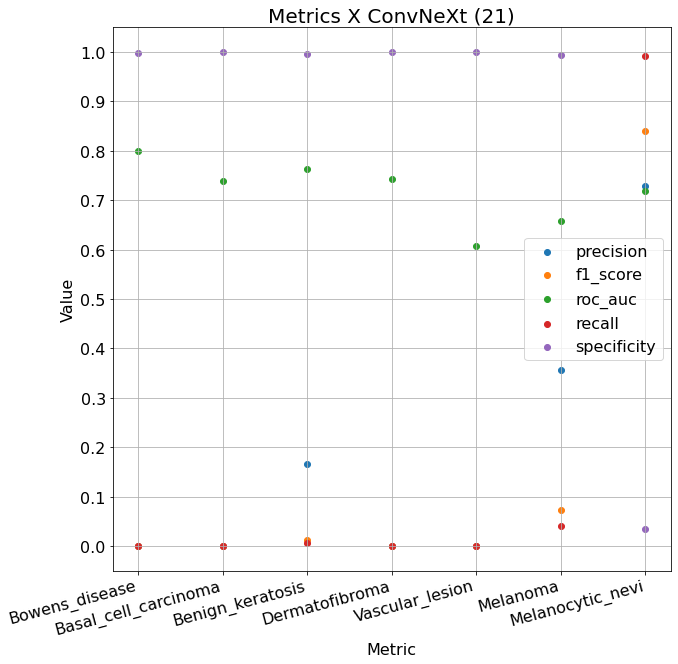

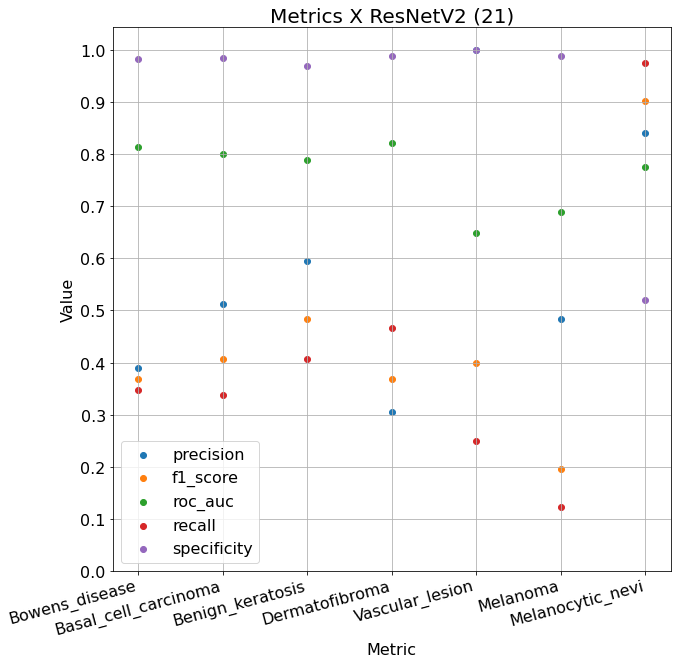

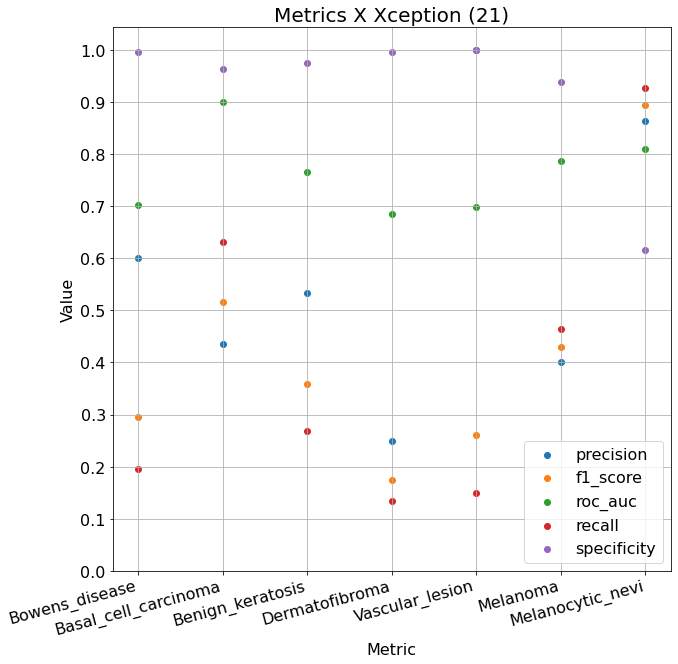

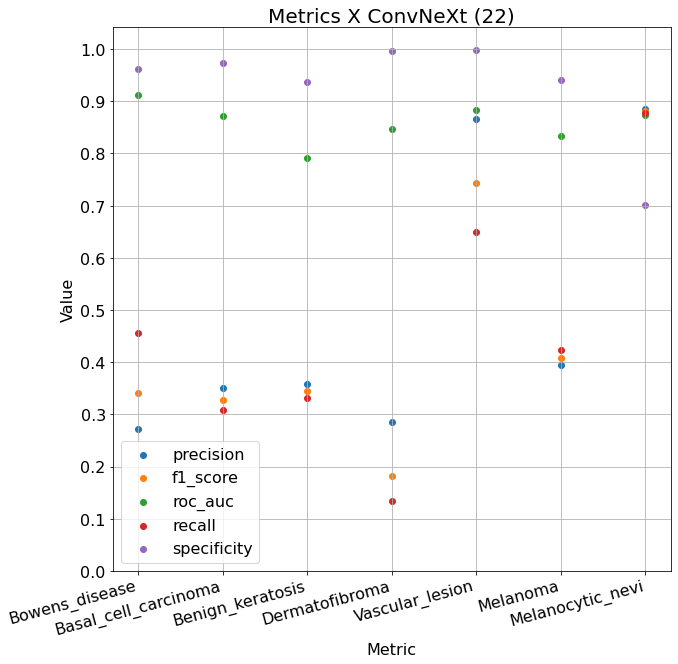

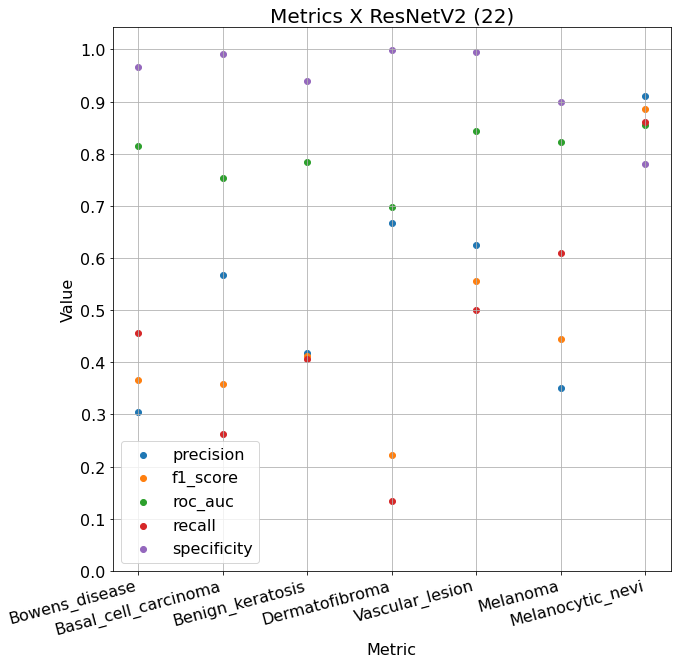

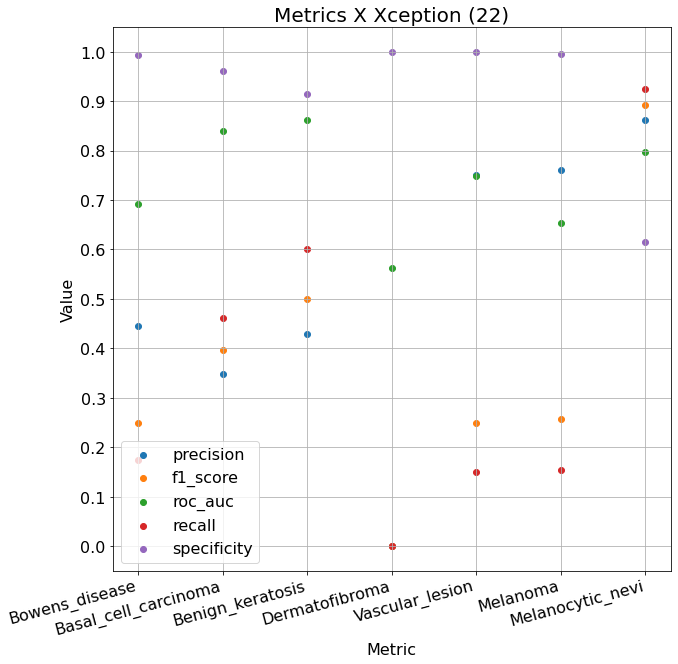

In [31]:
for (config_id, arch), group in df.groupby(['configuration_id', 'architecture']):
    plt.figure(figsize=(10, 10))
    for metric in notebookMetrics:
        plt.scatter(np.arange(len(group['type'])), group[metric], label=metric, marker='o')
    #group[['type', 'precision', 'f1_score', 'roc_auc', 'recall', 'specificity']].plot(x='type', marker='o', figsize=(15, 10))
    plt.title(f'Metrics X {arch} ({config_id})', fontsize=20)
    plt.rc('font', size=16)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel('Metric')
    plt.ylabel('Value')
    plt.legend(loc='best')
    plt.grid(True)
    ax = plt.gca()
    ax.set_xticks(np.arange(len(group['type'])))
    ax.set_xticklabels(group['type'], rotation=15, ha='right')
    plt.show()

## Close db connection

In [32]:
connection.close()